[![open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1WvAcYA36ar0vKoC9dEiB6jjAvVTua-BW?usp=sharing)

# Grid Search in sklearn

Grid Search in sklearn is very simple. We'll illustrate it with an example. Let's say we'd like to train a support vector machine, and we'd like to decide between the following parameters:

- kernel: poly or rbf.
- C: 0.1, 1, or 10.

(Note: These parameters can be used as a black box now, but we'll see them in detail in the Supervised Learning Section of the nanodegree.)

## The steps are the following:

- 1. Import GridSearchCV
from sklearn.model_selection import GridSearchCV
- 2. Select the parameters:
Here we pick what are the parameters we want to choose from, and form a dictionary. In this dictionary, the keys will be the names of the parameters, and the values will be the lists of possible values for each parameter.

    parameters = {'kernel':['poly', 'rbf'],'C':[0.1, 1, 10]}

- 3. Create a scorer.
We need to decide what metric we'll use to score each of the candidate models. In here, we'll use F1 Score.

  - from sklearn.metrics import make_scorer
  - from sklearn.metrics import f1_score
  - scorer = make_scorer(f1_score)
- 4. Create a GridSearch Object with the parameters, and the scorer. Use this object to fit the data.
    
  - \# Create the object.
  - grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
  - \# Fit the data
  - grid_fit = grid_obj.fit(X, y)

- 5. Get the best estimator.
  - best_clf = grid_fit.best_estimator_

Now you can use this estimator best_clf to make the predictions.

In the next page, you'll find a lab where you can use GridSearchCV to optimize a decision tree model.

# Improving a model with Grid Search

In this mini-lab, we'll fit a decision tree model to some sample data. This initial model will overfit heavily. Then we'll use Grid Search to find better parameters for this model, to reduce the overfitting.

First, some imports.

In [1]:
# Download Dataset
!gdown --id 1R4TCIWn1vBW_FzesAzVBiLuhRzqoTSlr

Downloading...
From: https://drive.google.com/uc?id=1R4TCIWn1vBW_FzesAzVBiLuhRzqoTSlr
To: /content/data.csv
100% 3.45k/3.45k [00:00<00:00, 6.84MB/s]


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Reading and plotting the data
Now, a function that will help us read the csv file, and plot the data.

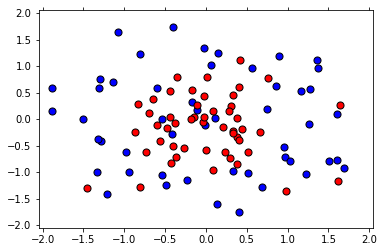

In [3]:
def load_pts(csv_name):
    data = np.asarray(pd.read_csv(csv_name, header=None))
    X = data[:,0:2]
    y = data[:,2]

    plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')
    
    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which='both',
        bottom='off',
        top='off')

    return X,y

X, y = load_pts('data.csv')
plt.show()

### 2. Splitting our data into training and testing sets

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer

#Fixing a random seed
import random
random.seed(42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Fitting a Decision Tree model

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Define the model (with default hyperparameters)
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

Now let's plot the model, and find the testing f1_score, to see how we did.

The following function will help us plot the model.

In [6]:
def plot_model(X, y, clf):
    plt.scatter(X[np.argwhere(y==0).flatten(),0],X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0],X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')

    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which='both',
        bottom='off',
        top='off')

    r = np.linspace(-2.1,2.1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    z = clf.predict(h)

    s = s.reshape((np.size(r),np.size(r)))
    t = t.reshape((np.size(r),np.size(r)))
    z = z.reshape((np.size(r),np.size(r)))

    plt.contourf(s,t,z,colors = ['blue','red'],alpha = 0.2,levels = range(-1,2))
    if len(np.unique(z)) > 1:
        plt.contour(s,t,z,colors = 'k', linewidths = 2)
    plt.show()

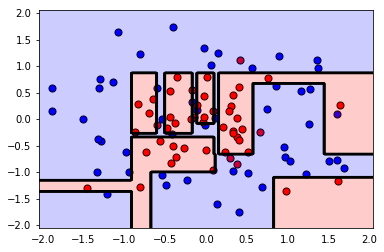

The Training F1 Score is 1.0
The Testing F1 Score is 0.7


In [ ]:
plot_model(X, y, clf)
print('The Training F1 Score is', f1_score(train_predictions, y_train))
print('The Testing F1 Score is', f1_score(test_predictions, y_test))

Woah! Some heavy overfitting there. Not just from looking at the graph, but also from looking at the difference between the high training score (1.0) and the low testing score (0.7).Let's see if we can find better hyperparameters for this model to do better. We'll use grid search for this.

### 4. (TODO) Use grid search to improve this model.

In here, we'll do the following steps:
1. First define some parameters to perform grid search on. We suggest to play with `max_depth`, `min_samples_leaf`, and `min_samples_split`.
2. Make a scorer for the model using `f1_score`.
3. Perform grid search on the classifier, using the parameters and the scorer.
4. Fit the data to the new classifier.
5. Plot the model and find the f1_score.
6. If the model is not much better, try changing the ranges for the parameters and fit it again.

**Optional Step** - Put the steps 2-6 mentioned above inside a function `calculate_F1_Score(parameters)` to make it reusable. <br><br>
**_Hint:_ If you're stuck and would like to see a working solution, check the solutions notebook in this same folder.**

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune.
parameters = None

def calculate_F1_Score(parameters):
    # TODO: Make an fbeta_score scoring object.
    scorer = None

    # TODO: Perform grid search on the classifier using 'scorer' as the scoring method.
    grid_obj = None

    # TODO: Fit the grid search object to the training data and find the optimal parameters.
    grid_fit = None

    # TODO: Get the estimator.
    best_clf = None

    # Fit the new model.
    best_clf.fit(X_train, y_train)

    # Make predictions using the new model.
    best_train_predictions = best_clf.predict(X_train)
    best_test_predictions = best_clf.predict(X_test)

    # Calculate the f1_score of the new model.
    print('The training F1 Score is', f1_score(best_train_predictions, y_train))
    print('The testing F1 Score is', f1_score(best_test_predictions, y_test))

    # Plot the new model.
    plot_model(X, y, best_clf)

    # Let's also explore what parameters ended up being used in the new model.
    print(best_clf)

#----------------------------------------------#

# Call the function
calculate_F1_Score(parameters)

Did you notice that a finer grid is giving you less accurate results than a coarser grid?

Grid	Training || F1 Score	|| Testing F1 Score

Coarser grid (step-size 2)	0.814814814815	0.8

Finer grid (step-size 1)	0.8	0.72

To understand the results better, re-run the model above with verbose attribute of GridSearchCV() set to 3 in order to see the detailed cross validation scores:

- grid_obj = GridSearchCV(clf, parameters, scoring=scorer, verbose=3)
print(grid_obj)

The following points will answer the anomaly shown in the table above:

- How many combinations of hyperparameters are getting evaluated?
- How does the 3-fold cross validation works?
- Does the size of the training data plays any role in the model accuracy?

Read the response to the questions above in our Knowledge post.

## Conclusion
Note that by using GridSearch we improved the F1 Score from 0.7 to 0.8 (and we lost some training score, but this is ok). Also, if you look at the plot, the second model has a much simpler boundary, which implies that it's less likely to overfit.